In [19]:
pwd

'C:\\Users\\Baron\\Desktop\\EE_258_Repo\\EE_258\\ML_PATH_EE258\\EE258_env\\EE-210'

### Conversion

In [15]:
import sympy as sp

from prettytable import PrettyTable

# Enable pretty printing
sp.init_printing()


# Define symbolic variables
z = sp.Symbol('z')
z_inv = sp.Symbol('z_inv')


# Define H(z⁻¹) using plain Python fractions
#H_zinv = (2 - (1/6) * z**(-1)) / ((1 - (1/2) * z**(-1)) * (1 - (1/3) * z**(-1)))
# Define H(z⁻¹) using normal Python-style fractions
#H_zinv = ((4/3) + (2/3) * z**(-1)) / ((1 - z**(-1)) * (1 + (1/2) * z**(-1)))

H_zinv = ((-2/3) * z**(-1)) / ((1 - (1/3) * z**(-1)) * (1 + (3/4) * z**(-1)))
H_zinv

In [17]:
import sympy as sp

from prettytable import PrettyTable

# Enable pretty printing
sp.init_printing()

# Define symbolic variables
z = sp.Symbol('z')
z_inv = sp.Symbol('z_inv')

def from_inverse_z_to_factored():
    # H(z) in terms of z^(-1)
    #H_zinv = (2 - (1/6) * z**(-1)) / ((1 - (1/2) * z**(-1)) * (1 - (1/3) * z**(-1)))
    # Multiply by z^2 to eliminate negative powers
    H_z_simp = sp.simplify(H_zinv)
    H_z = sp.factor(H_z_simp)  # Factor for cleaner appearance
    return H_z

def from_factored_to_inverse_z():
    # Start with factored z form
    H_z = (2 * z * (z - 1/12)) / ((z - 1/2) * (z - 1/3))
    # Substitute z = 1 / z_inv
    H_zinv = H_z.subs(z, 1/z_inv)
    H_zinv = sp.simplify(H_zinv)
    return H_zinv

# Get the outputs
factored_expr = from_inverse_z_to_factored()
zinv_expr = from_factored_to_inverse_z()

# Pretty print
print("From z^(-1) to factored z form:")
sp.pprint(factored_expr, use_unicode=True)

print("\nFrom factored z to z^(-1) form:")
sp.pprint(zinv_expr, use_unicode=True)


From z^(-1) to factored z form:
          -0.666666666666667⋅z            
──────────────────────────────────────────
(1.0⋅z - 0.333333333333333)⋅(1.0⋅z + 0.75)

From factored z to z^(-1) form:
        2 - 0.166666666666667⋅zᵢₙᵥ         
───────────────────────────────────────────
(0.333333333333333⋅zᵢₙᵥ - 1)⋅(0.5⋅zᵢₙᵥ - 1)


In [19]:
# Extract the denominator only
denominator = sp.denom(H_zinv)

# Optionally expand it
expanded_denom = sp.expand(denominator)


print("\nExpanded denominator:")
expanded_denom


Expanded denominator:


### Partial Fraction Expansion

In [23]:
# Define variables
z = sp.Symbol('z')
u = sp.Symbol('u')  # u = z⁻¹

# Original transfer function H(z⁻¹)

# Substitute u = z⁻¹ to make it rational in u
H_u = H_zinv.subs(1/z, u)

# Perform partial fraction expansion in u
H_u_pfe = sp.apart(H_u, u)

# Substitute back u = 1/z to return to z⁻¹ form (optional)
H_zinv_pfe = H_u_pfe.subs(u, 1/z)
H_zinv_pfe*-1

In [ ]:
approxi

### Poles Zeros

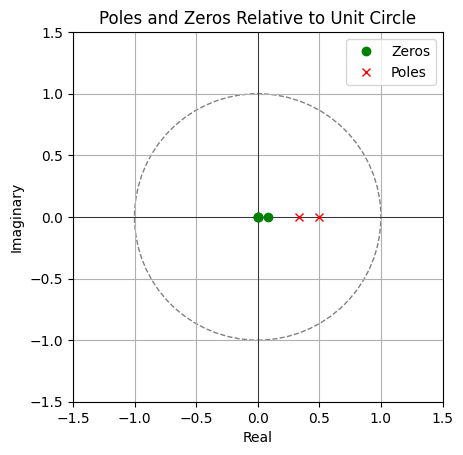

[0.5        0.33333333]
[0.08333333 0.         0.         0.        ]


In [157]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Setup symbols
sp.init_printing()
z = sp.Symbol('z')

# Define H(z⁻¹)
H_zinv = (2 - (1/6) * z**(-1)) / ((1 - (1/2) * z**(-1)) * (1 - (1/3) * z**(-1)))

# Multiply both num and denom by z^2 to eliminate all negative powers
H_z = sp.simplify(H_zinv * z**2)

# Expand numerator and denominator
numer = sp.expand(sp.numer(H_z))
denom = sp.expand(sp.denom(H_z))

# Convert symbolic expressions to polynomial coefficient lists
num_poly = sp.Poly(numer, z)
den_poly = sp.Poly(denom, z)

num_coeffs = [float(c) for c in num_poly.all_coeffs()]
den_coeffs = [float(c) for c in den_poly.all_coeffs()]

# Compute poles and zeros
zeros = np.roots(num_coeffs)
poles = np.roots(den_coeffs)

# Plot
fig, ax = plt.subplots()
ax.set_title("Poles and Zeros Relative to Unit Circle")
ax.set_xlabel("Real")
ax.set_ylabel("Imaginary")
ax.axhline(0, color='black', lw=0.5)
ax.axvline(0, color='black', lw=0.5)
ax.set_aspect('equal')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.grid(True)

# Draw unit circle
unit_circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
ax.add_artist(unit_circle)

# Plot zeros and poles
ax.plot(np.real(zeros), np.imag(zeros), 'go', label='Zeros')
ax.plot(np.real(poles), np.imag(poles), 'rx', label='Poles')

ax.legend()
plt.show()

print(poles)
print(zeros)


In [135]:
from prettytable import PrettyTable

from fractions import Fraction

# Create a table with columns
table = PrettyTable()
table.field_names = [
    "x",
    "1/x (Fraction)", "1/x (Decimal)",
    "2/x (Fraction)", "2/x (Decimal)",
    "3/x (Fraction)", "3/x (Decimal)"
]

# Fill the table with values
for x in range(1, 31):
    f1 = Fraction(1, x)
    f2 = Fraction(2, x)
    f3 = Fraction(3, x)
    table.add_row([
        x,
        str(f1), round(float(f1), 5),
        str(f2), round(float(f2), 5),
        str(f3), round(float(f3), 5)
    ])

# Print the table
print(table)

+----+----------------+---------------+----------------+---------------+----------------+---------------+
| x  | 1/x (Fraction) | 1/x (Decimal) | 2/x (Fraction) | 2/x (Decimal) | 3/x (Fraction) | 3/x (Decimal) |
+----+----------------+---------------+----------------+---------------+----------------+---------------+
| 1  |       1        |      1.0      |       2        |      2.0      |       3        |      3.0      |
| 2  |      1/2       |      0.5      |       1        |      1.0      |      3/2       |      1.5      |
| 3  |      1/3       |    0.33333    |      2/3       |    0.66667    |       1        |      1.0      |
| 4  |      1/4       |      0.25     |      1/2       |      0.5      |      3/4       |      0.75     |
| 5  |      1/5       |      0.2      |      2/5       |      0.4      |      3/5       |      0.6      |
| 6  |      1/6       |    0.16667    |      1/3       |    0.33333    |      1/2       |      0.5      |
| 7  |      1/7       |    0.14286    |      2